# mardianto tandi ramma

# 2109106109

## posttest5

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score


#### membaca dataset

In [238]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##### Pisahkan fitur (X) dan label (y)

In [239]:
X = df[['age', 'sex']] 
y = df['exang'] 

##### Bagi dataset menjadi data pelatihan dan data pengujian

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Inisialisasi model SVC

#####

In [241]:
svc = SVC()

##### Latih model SVC pada data pelatihan

In [242]:
svc.fit(X_train, y_train)

SVC()

##### Lakukan prediksi dengan SVC pada data pengujian

In [243]:
y_pred_svc = svc.predict(X_test)

##### Hitung confusion matrix dengan SVC

In [244]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

##### Hitung classification report dengan SVC

In [245]:
class_report_svc = classification_report(y_test, y_pred_svc)


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [246]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

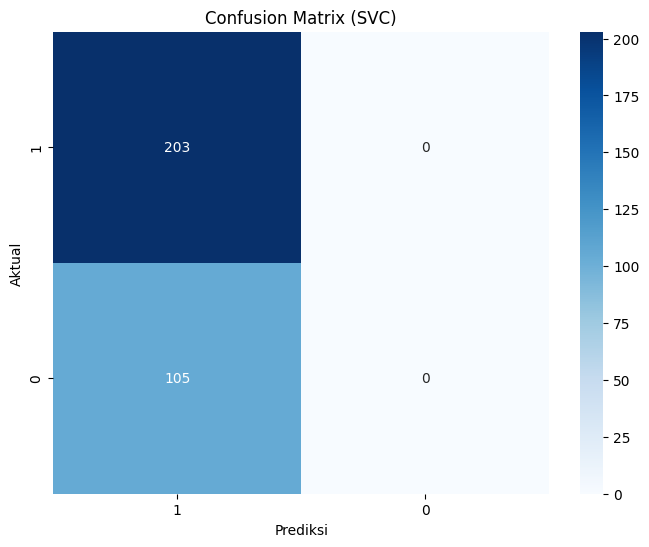

In [247]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

In [248]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

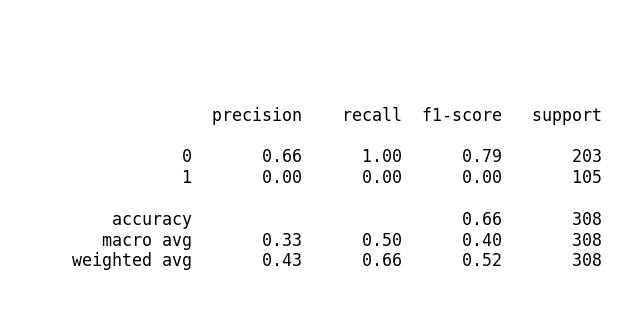

In [249]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

##### Konversi label kelas ke kode warna numerik

In [250]:
color_map = {'1': 'r', '0': 'g'}

# Periksa setiap label dalam y_pred_svc dan y_test, dan tambahkan ke kamus jika belum ada
for label in y_pred_svc:
    if label not in color_map:
        color_map[label] = 'other_color'

for label in y_test:
    if label not in color_map:
        color_map[label] = 'other_color'


In [251]:
# Masukkan Dataset Diabetes ke dalam 2 variabel
age, sex = datasets.load_diabetes(return_X_y=True)
# Gunakan hanya 1 variabel X (atribut)
age = age[:, np.newaxis, 2]
# Bagi data variabel X & Y ke dalam Train Set dan Test Set
sex_train = age[:-20] # Dari 0 - Sebelum 20 Data Terakhir
sex_train = sex[:-20]
sex_test = age[-20:] # 20 Data Terakhir - Keseluruhan Data
sex_test = sex[-20:]
# Buat objek Regresi Linear dari Library Scikit-Learn
reg = linear_model.LinearRegression()
# Latih model tersebut dengan variabel X dan Y dari Train Set
reg.fit(age, sex)
# Prediksi variabel Y dengan menggunakan variabel X dari Test Set
diabetes_y_pred = reg.predict(age)

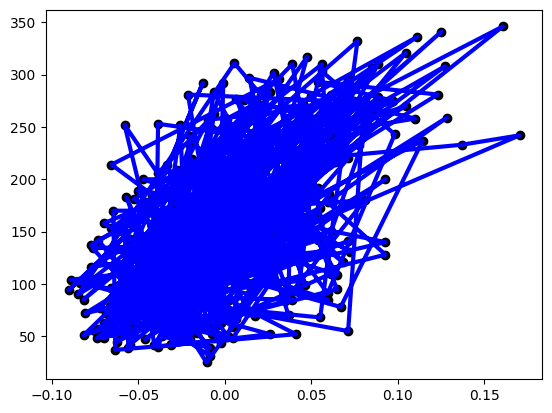

In [252]:
# Buat Grafik dari Hasil Prediksi
plt.scatter(age, sex, color="black")
plt.plot(age, sex,
color="blue", linewidth=3)
plt.show()

### linier regresion    

In [253]:
X = df[['age','sex']]

In [254]:
y = df['age'] 

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [257]:
y_pred = model.predict(X_test)

In [258]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

In [259]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 1.7330310628295126e-15
MSE: 1.231392632540116e-29
RMSE: 3.5091204489730984e-15
R2-Score: 1.0


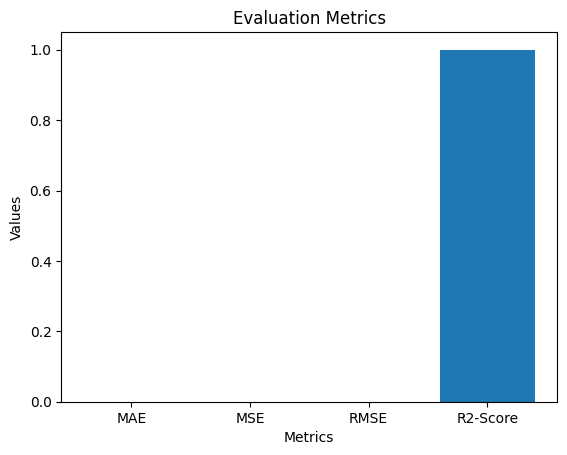

In [260]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

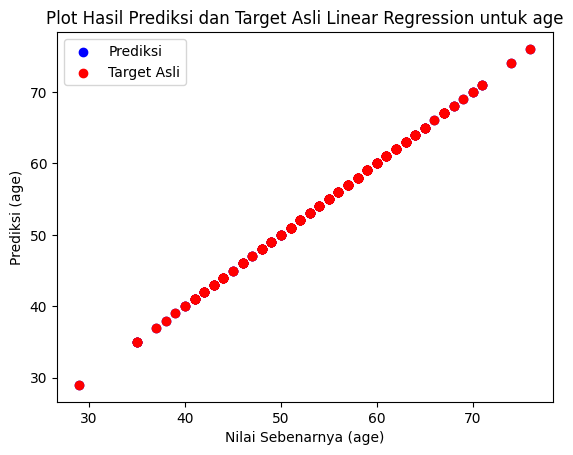

In [261]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (age)")
plt.ylabel("Prediksi (age)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk age")
plt.legend()
plt.show()

### unsupervised learning

In [262]:
X = df.iloc[:, [0, 4]].values 

In [263]:
wcss = [] 

In [264]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

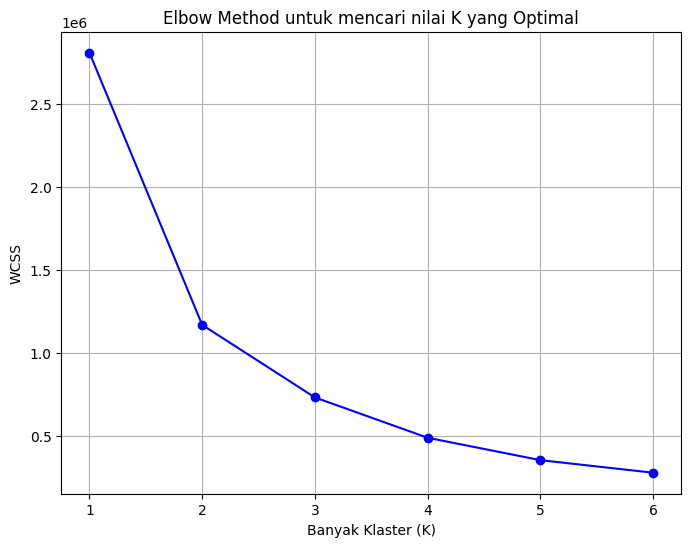

In [265]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [266]:
k = 3 
kmeans = KMeans(k, n_init=10)

In [267]:
X = df[["age", "sex"]]

In [268]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [269]:
predicted_clusters = kmeans.predict(X)

In [270]:
df["cluster"] = predicted_clusters

### B2

In [271]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"age: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"sex: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"exang: {ch_index:.2f}")

age: 0.56
sex: 0.54
exang: 2941.45


In [272]:
true_labels = df['age']

In [273]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
age    29  34  35  37  38  39  40  41  42  43  ...  65  66  67  68  69  70  \
row_0                                          ...                           
0       0   0   0   0   0   0   0   0   0   0  ...  27  25  31  12   9  14   
1       4   6  15   6  12  14  11  32  26  26  ...   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

age    71  74  76  77  
row_0                  
0      11   3   3   3  
1       0   0   0   0  
2       0   0   0   0  

[3 rows x 41 columns] 



In [274]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.12


In [275]:
nmi_age = normalized_mutual_info_score(df['age'], predicted_clusters)
nmi_educational_num = normalized_mutual_info_score(df['sex'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for Age: {nmi_age:.2f}")
print(f"Normalized Mutual Information (NMI) for Educational Num: {nmi_educational_num:.2f}")

Normalized Mutual Information (NMI) for Age: 0.47
Normalized Mutual Information (NMI) for Educational Num: 0.01


In [276]:
homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"age: {homogeneity:.2f}")
print(f"sex: {completeness:.2f}")
print(f"exang: {v_measure:.2f}")

age: 0.31
sex: 1.00
exang: 0.47


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1044\2946344615.py:5: UserWarning: 
The palette list has fewer values (3) than needed (152) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x="age", y="sex", palette=colors,


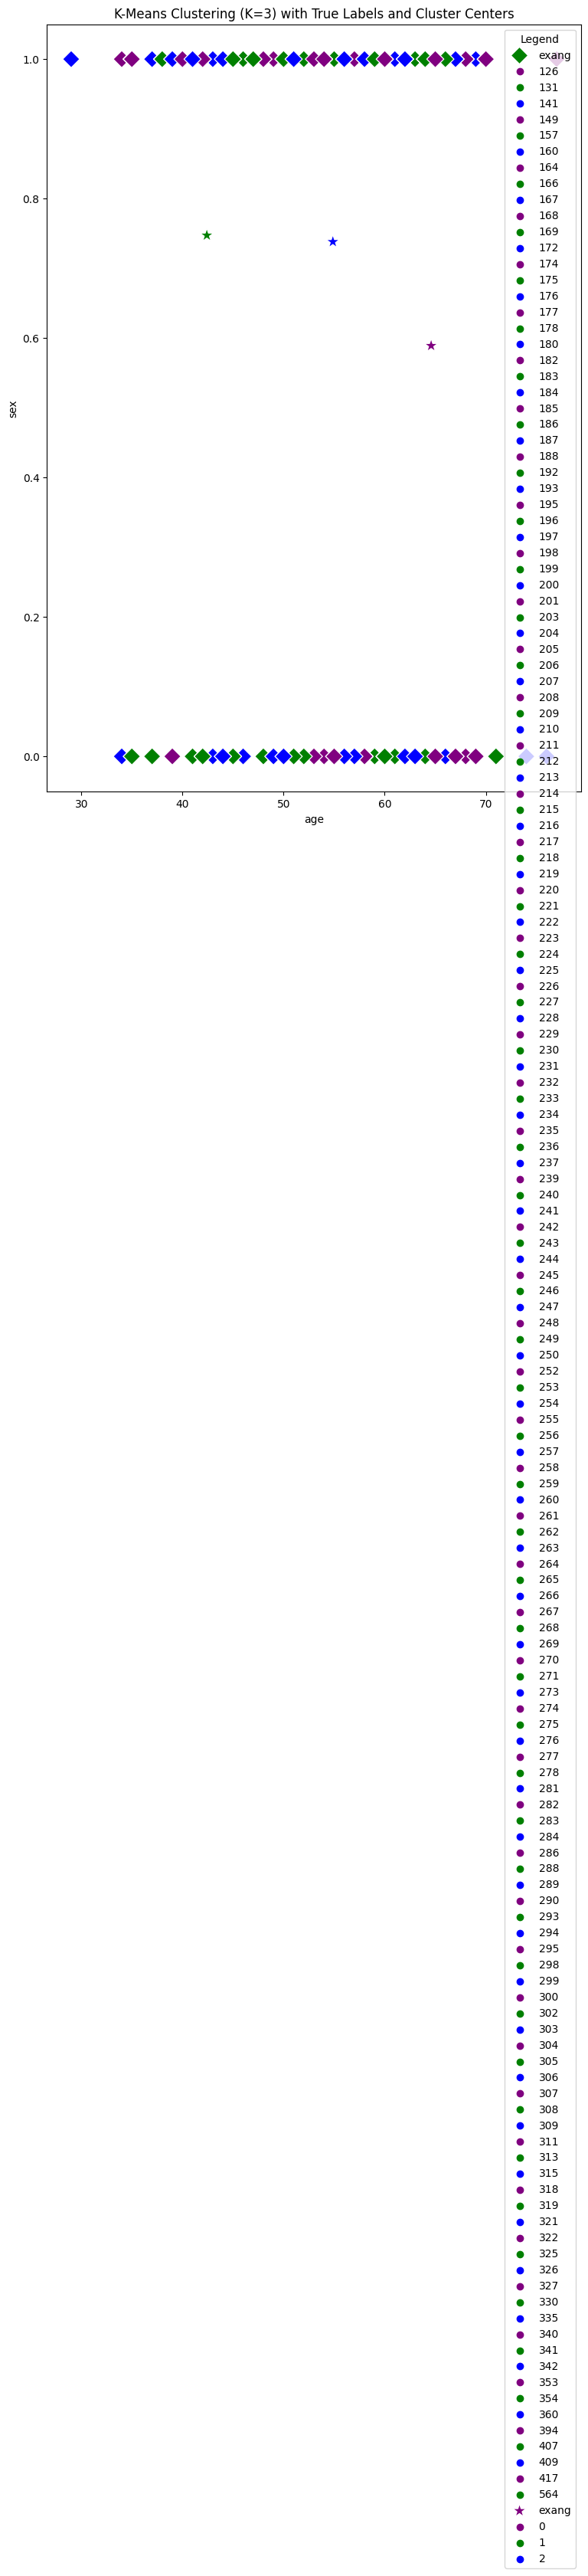

In [279]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="age", y="sex", palette=colors,
                hue=df["chol"], marker="D", s=130, label="exang")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("exang").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["age"], y=cluster_centers["sex"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="exang")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("age")
plt.ylabel("sex")
plt.legend(title="Legend", loc="upper right")
plt.show()